In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import Dropout,Dense 
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
d = pd.read_csv('/content/gdrive/My Drive/Datasets/CHESS_DATA.csv')

In [4]:
d.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,C2,D2,E2,F2,G2,H2,A3,B3,C3,D3,E3,F3,G3,H3,A4,B4,C4,D4,E4,F4,G4,H4,A5,B5,C5,D5,E5,F5,G5,H5,A6,B6,C6,D6,E6,F6,G6,H6,A7,B7,C7,D7,E7,F7,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8,MOVE_FROM,MOVE_TO
0,WR,WN,WB,WQ,WK,WB,WN,WR,WP,WP,WP,WP,WP,WP,WP,WP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LP,LP,LP,LP,LP,LP,LP,LP,LR,LN,LB,LQ,LK,LB,LN,LR,D2,D4
1,WR,WN,WB,WQ,WK,WB,WN,WR,WP,WP,WP,0,WP,WP,WP,WP,0,0,0,0,0,0,0,0,0,0,0,WP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,LP,LP,LP,LP,LP,LP,LP,LP,LR,LN,LB,LQ,LK,LB,LN,LR,D7,D5
2,WR,WN,WB,WQ,WK,WB,WN,WR,WP,WP,WP,0,WP,WP,WP,WP,0,0,0,0,0,0,0,0,0,0,0,WP,0,0,0,0,0,0,0,LP,0,0,0,0,0,0,0,0,0,0,0,0,LP,LP,LP,0,LP,LP,LP,LP,LR,LN,LB,LQ,LK,LB,LN,LR,C2,C4
3,WR,WN,WB,WQ,WK,WB,WN,WR,WP,WP,0,0,WP,WP,WP,WP,0,0,0,0,0,0,0,0,0,0,WP,WP,0,0,0,0,0,0,0,LP,0,0,0,0,0,0,0,0,0,0,0,0,LP,LP,LP,0,LP,LP,LP,LP,LR,LN,LB,LQ,LK,LB,LN,LR,E7,E6
4,WR,WN,WB,WQ,WK,WB,WN,WR,WP,WP,0,0,WP,WP,WP,WP,0,0,0,0,0,0,0,0,0,0,WP,WP,0,0,0,0,0,0,0,LP,0,0,0,0,0,0,0,0,LP,0,0,0,LP,LP,LP,0,0,LP,LP,LP,LR,LN,LB,LQ,LK,LB,LN,LR,B1,C3


In [5]:
from sklearn.preprocessing import LabelEncoder
i=LabelEncoder()
o=LabelEncoder()

In [6]:
y = np.array(d['MOVE_FROM'])
y = o.fit_transform(y)

In [7]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
x_columns = list()
for i in range(1, 9):
    for j in range(1, 9):
        x_columns.append(f'{alphabet[j-1]}{i}')

In [8]:
for col in x_columns:
    d[col] = o.fit_transform(d[col])
X = d[x_columns]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
input = x_test.shape[1]

In [11]:
model = Sequential()

model.add(Dense(units=256,activation='relu',input_shape=(input,)))
model.add(Dropout((0.5)))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(units=64,activation='softmax'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32910/32910 [==============================] - 283s 9ms/step - loss: 1239.7590 - accuracy: 0.0160 - val_loss: 1241.0913 - val_accuracy: 0.0138
Epoch 2/10
32910/32910 [==============================] - 281s 9ms/step - loss: 1242.2365 - accuracy: 0.0159 - val_loss: 1241.0913 - val_accuracy: 0.0243
Epoch 3/10
32910/32910 [==============================] - 281s 9ms/step - loss: 1240.7214 - accuracy: 0.0164 - val_loss: 1241.0913 - val_accuracy: 0.0147
Epoch 4/10
32910/32910 [==============================] - 285s 9ms/step - loss: 1240.9827 - accuracy: 0.0158 - val_loss: 1241.0913 - val_accuracy: 0.0076
Epoch 5/10
32910/32910 [==============================] - 284s 9ms/step - loss: 1240.3770 - accuracy: 0.0159 - val_loss: 1241.0913 - val_accuracy: 0.0129
Epoch 6/10
32910/32910 [==============================] - 285s 9ms/step - loss: 1242.0106 - accuracy: 0.0158 - val_loss: 1241.0913 - val_accuracy: 0.0155
Epoch 7/10
32910/32910 [==============================] - 288s 9ms/step - lo

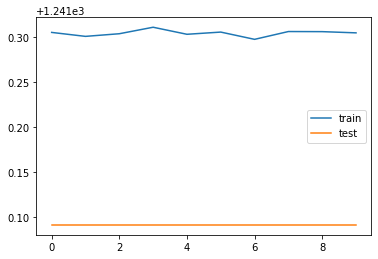

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()